In [2]:
!rm -r /content/Detecting-Hand-LandMarks-Project/
!git clone https://github.com/MazenFayed/Detecting-Hand-LandMarks-Project.git

Cloning into 'Detecting-Hand-LandMarks-Project'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 13.11 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
%cd  Detecting-Hand-LandMarks-Project

/content/Detecting-Hand-LandMarks-Project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.svm import SVC

In [5]:
df = pd.read_csv("hand_landmarks_data.csv")
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [8]:
df.isna().sum()

,0
x1,0
y1,0
z1,0
x2,0
y2,0
...,...
z20,0
x21,0
y21,0
z21,0


<Axes: xlabel='label', ylabel='count'>

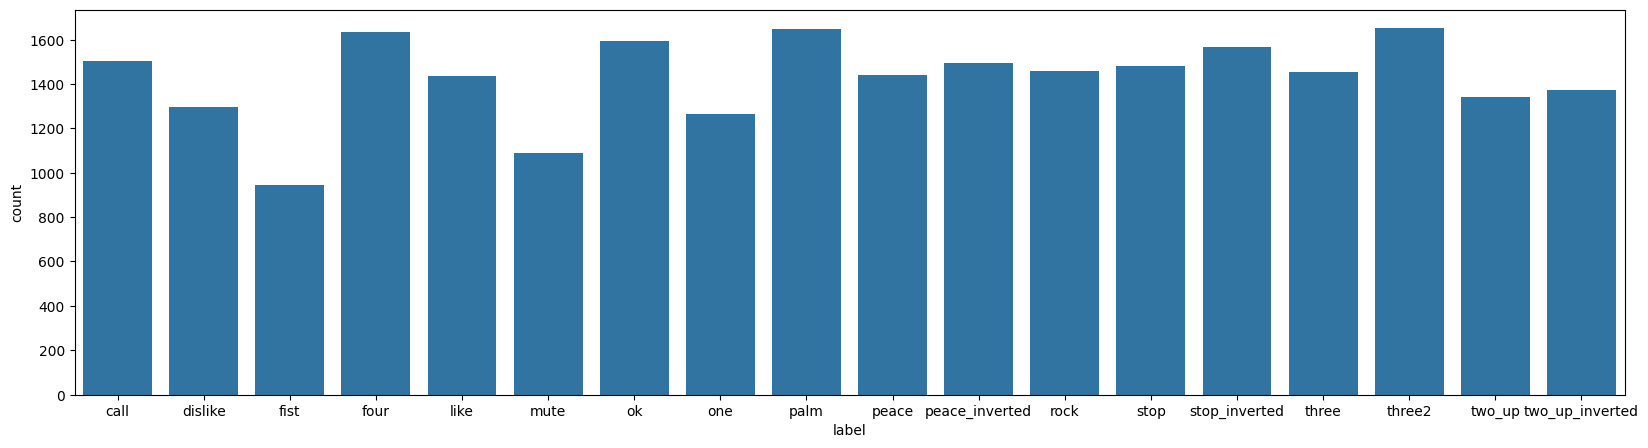

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x="label")

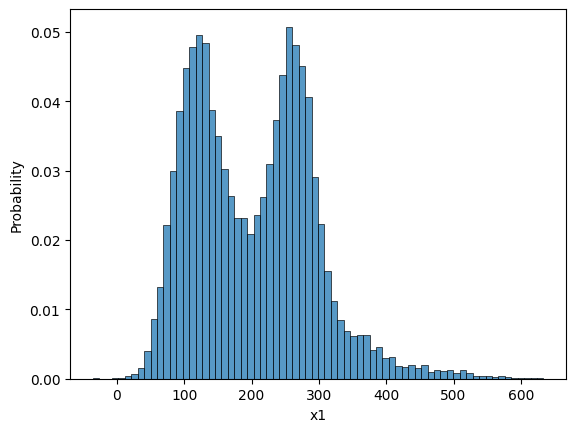

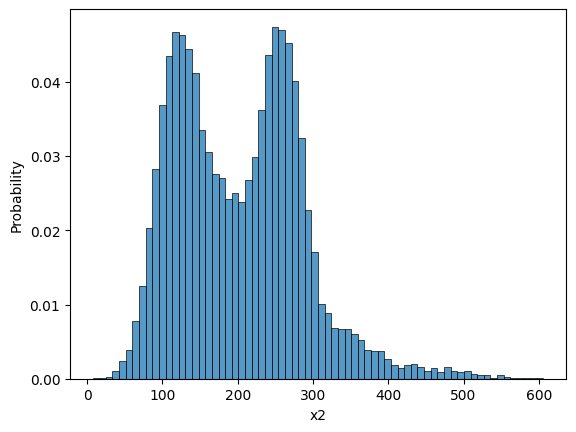

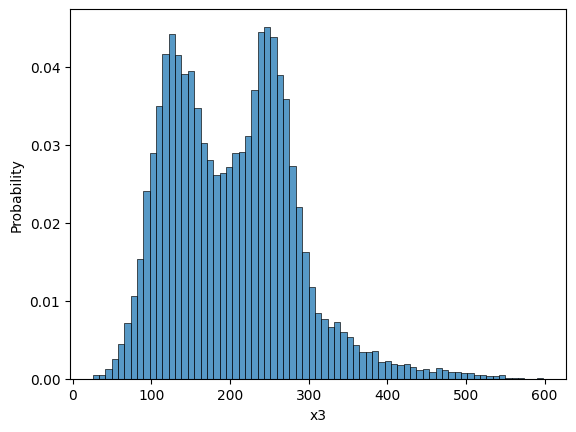

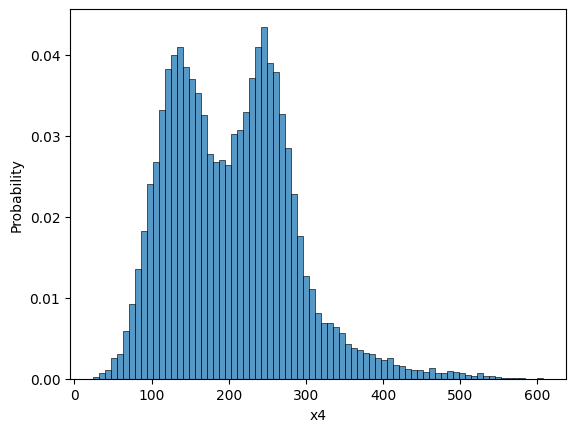

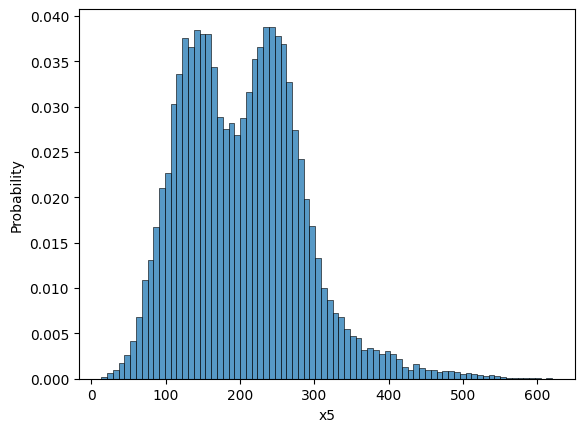

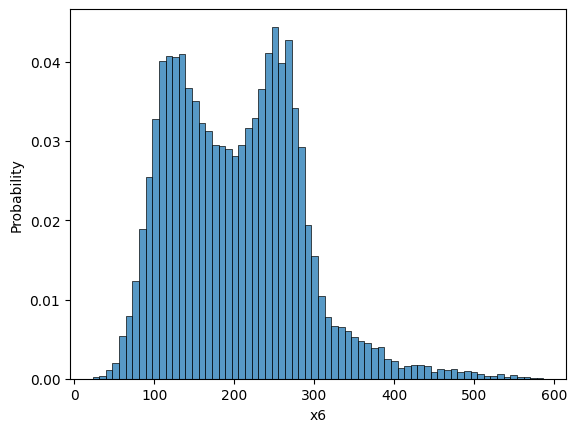

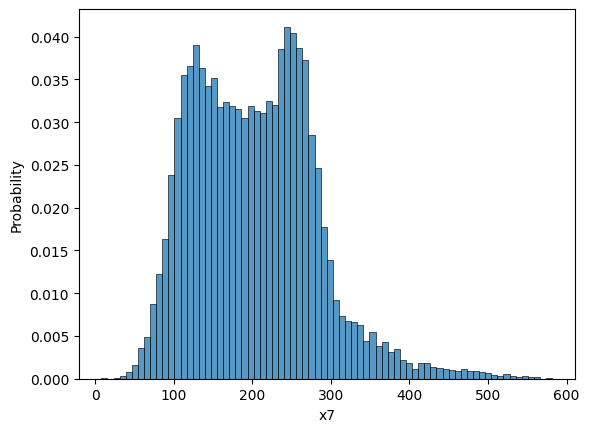

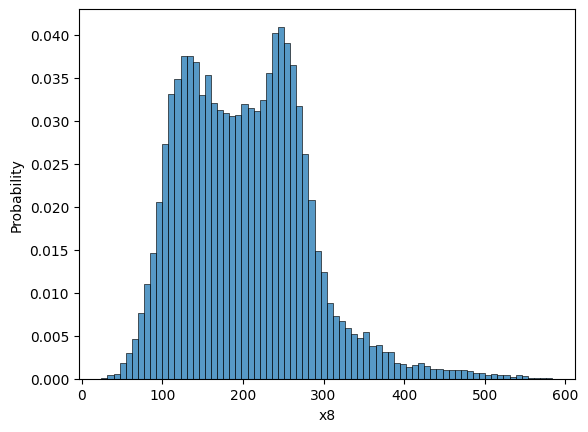

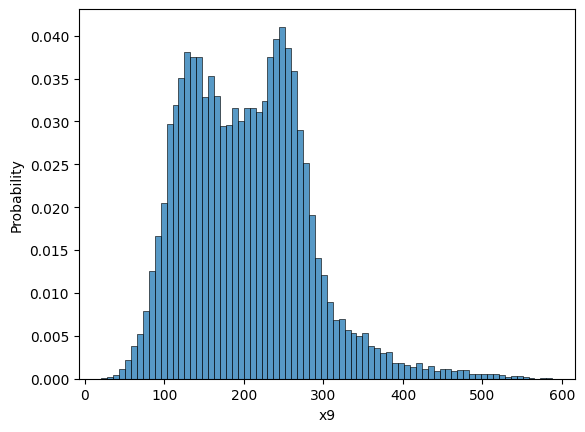

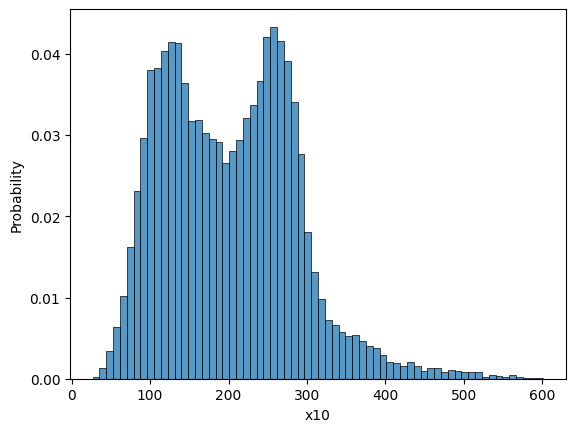

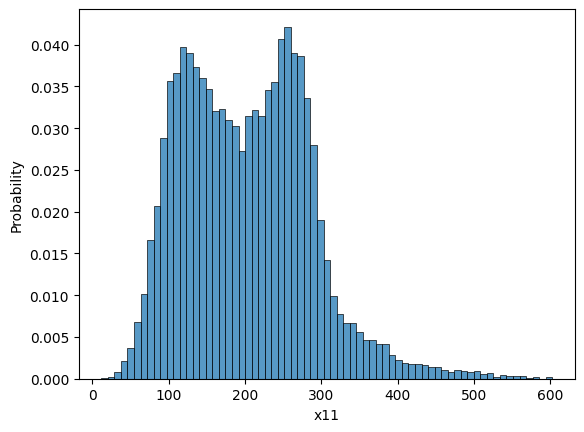

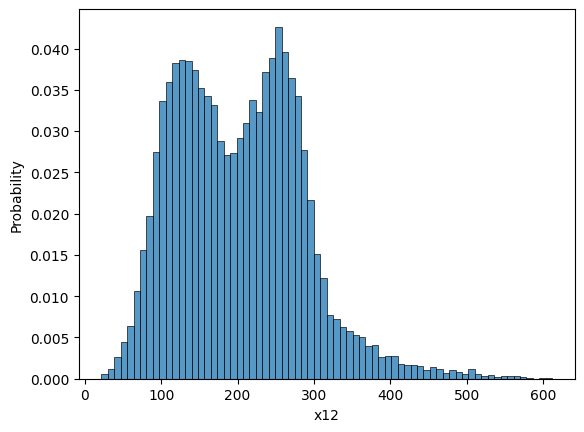

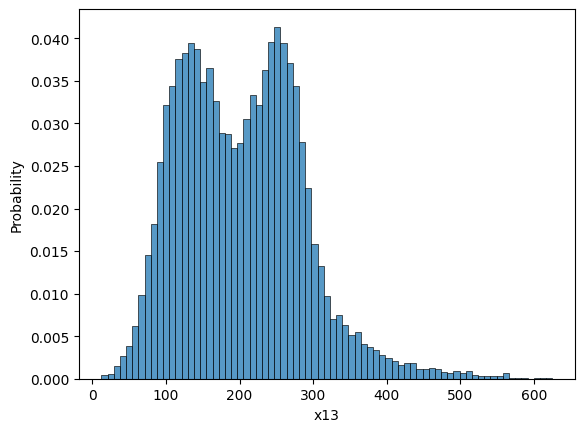

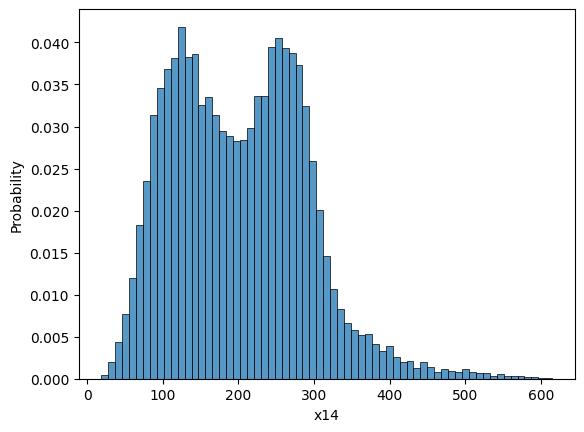

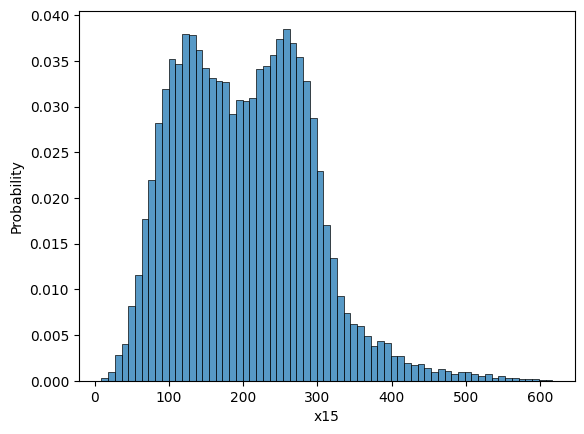

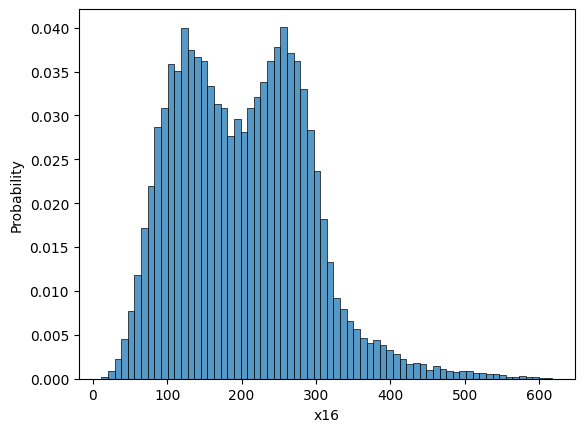

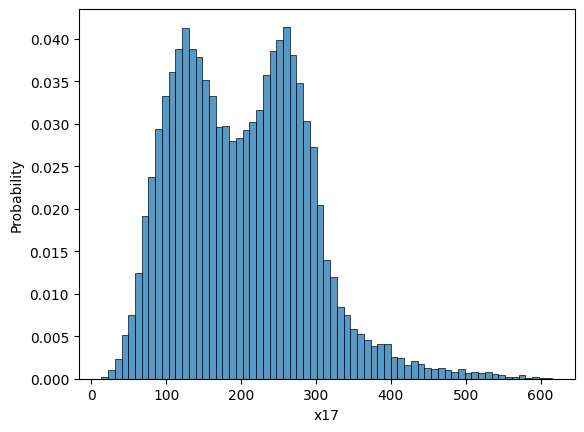

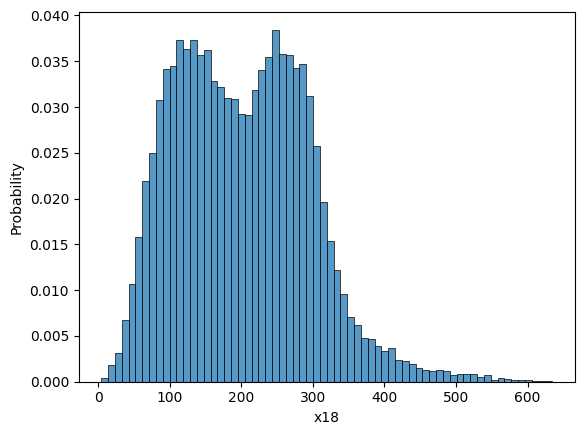

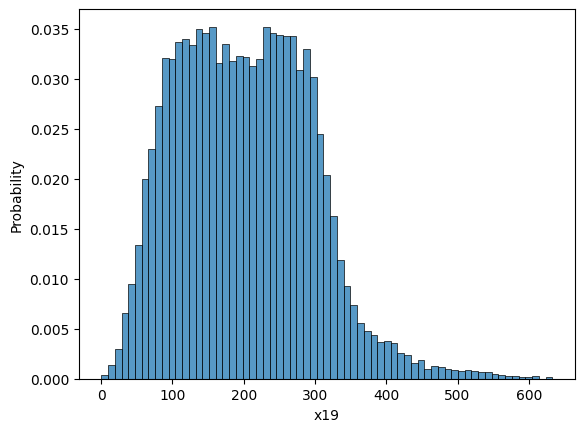

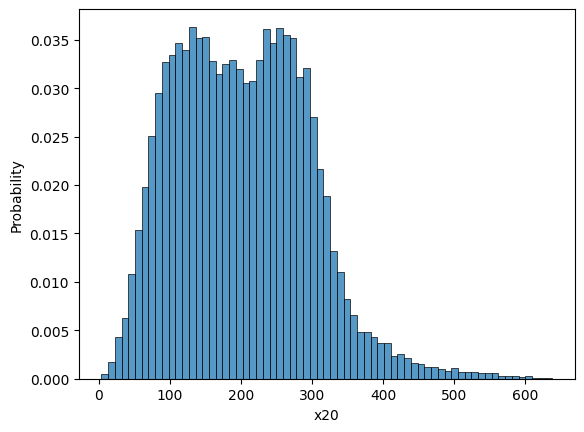

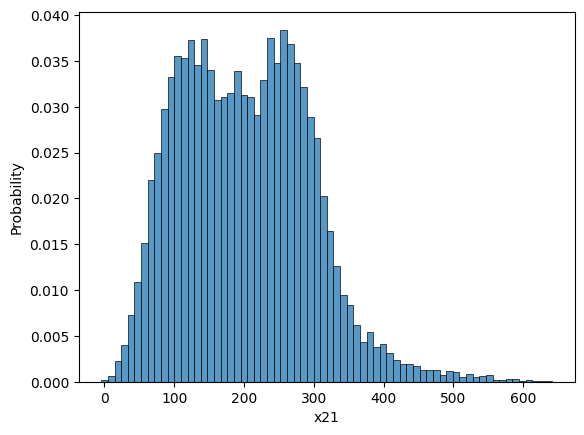

In [10]:
for i in range(1,22):
  sns.histplot(data=df,x=f"x{str(i)}",stat="probability")
  plt.show()

In [11]:
x_cols=[]
y_cols=[]
z_cols=[]
for i in range(1,22):
    x_cols.append(f"x{str(i)}")
    y_cols.append(f"y{str(i)}")
    z_cols.append(f"z{str(i)}")

#### cut data into labels and features and recenter x,y values on x1,y1(whrist)

In [12]:
labels=df[["label"]]
features = df.iloc[:, :-1]
features=features.drop(columns=z_cols,axis=1)
features[x_cols[1:]] = features[x_cols[1:]].sub(features[x_cols[0]], axis=0)
features[y_cols[1:]] = features[y_cols[1:]].sub(features[y_cols[0]], axis=0)
features

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,262.669968,257.304901,-5.252426,-10.195847,-15.787010,-15.588074,-26.285431,-15.850983,-32.593300,-13.357376,...,-31.915558,10.764618,-26.157440,-5.598724,-39.324875,-1.814209,-47.626602,0.809845,-54.663574,2.303772
1,83.351778,346.059113,-1.426741,-17.496765,6.728354,-34.523865,12.290045,-47.198486,11.118582,-58.760345,...,35.209608,-9.411163,32.893301,-4.111328,49.099840,-4.264679,59.421804,-3.229858,69.079920,-3.043121
2,187.756977,260.235492,7.703602,-18.729457,19.502552,-36.561153,27.656651,-51.200132,27.015896,-63.625904,...,45.268490,4.269981,42.343197,5.348683,62.544033,8.367446,74.668156,11.041146,85.232975,12.036739
3,114.976696,331.594238,-0.473202,-11.044281,1.659931,-21.513245,2.708370,-29.720123,1.789913,-36.616425,...,22.066864,-7.186432,20.509140,-2.544128,30.218754,-2.236694,36.076504,-1.881897,41.013668,-2.045410
4,188.795288,141.727867,-0.274384,-13.780403,3.187592,-30.717304,3.757233,-43.040176,-0.555725,-51.333578,...,25.275940,-10.225239,24.310532,-6.434658,37.901108,-9.464619,46.036453,-11.043720,52.792480,-13.250679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,11.962601,-20.208862,10.214630,-40.003891,-1.801117,-49.559860,-13.758614,-52.055466,...,-16.362854,-45.330048,-28.010513,-36.696228,-28.033470,-47.233887,-24.118378,-42.512924,-21.526909,-36.623825
25671,90.063995,256.181732,-12.761765,-18.352600,-11.405107,-35.710052,-0.689833,-44.794556,8.527554,-46.572403,...,12.212368,-41.956894,25.748417,-32.909576,26.628330,-45.249725,22.617989,-40.907379,20.114353,-34.843353
25672,236.724518,251.496756,18.193840,-19.126800,19.277985,-41.527650,10.350929,-58.093909,0.669067,-67.503245,...,-10.511650,-47.692892,-27.626244,-45.956711,-24.790741,-49.106781,-21.231125,-42.543484,-18.666870,-36.259837
25673,119.466957,309.842529,-7.694893,-18.532196,-2.571510,-36.158600,9.772831,-44.434784,20.629360,-45.085358,...,26.283268,-37.984436,28.700684,-29.814026,37.750465,-38.785828,35.313148,-32.581390,30.650162,-27.831482


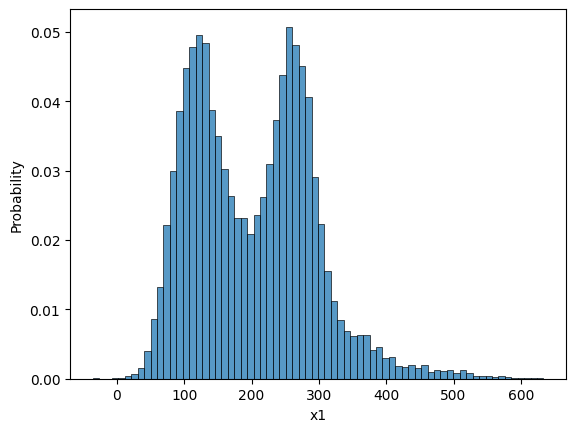

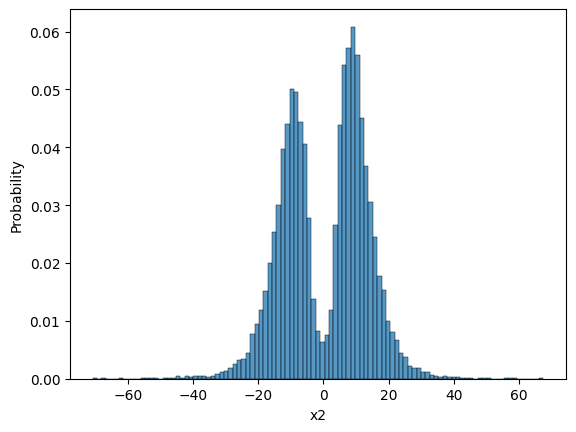

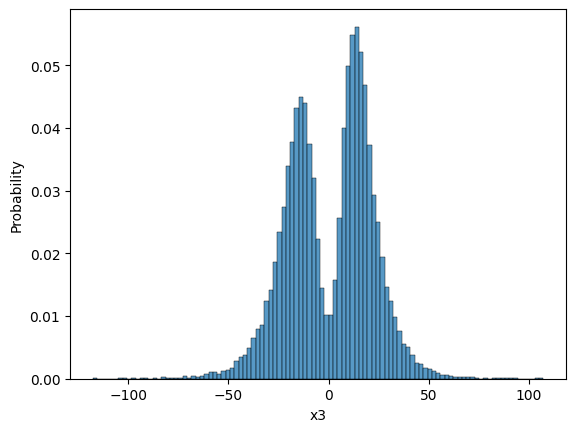

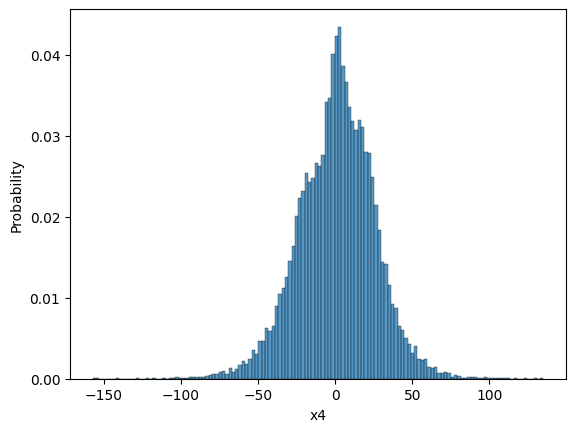

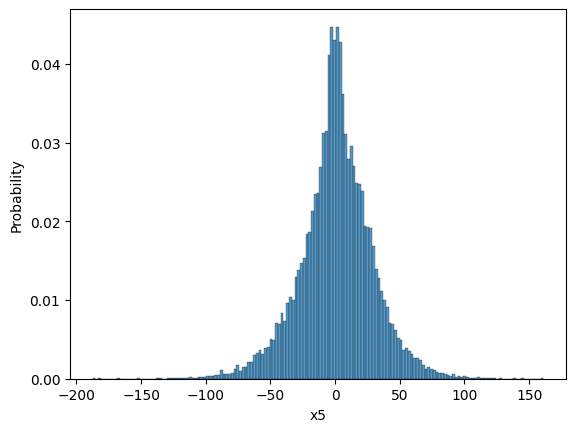

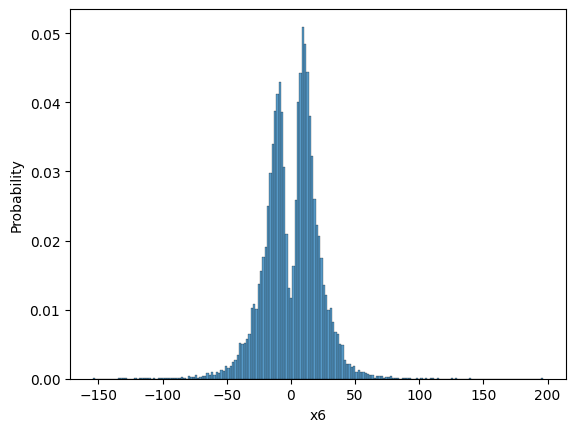

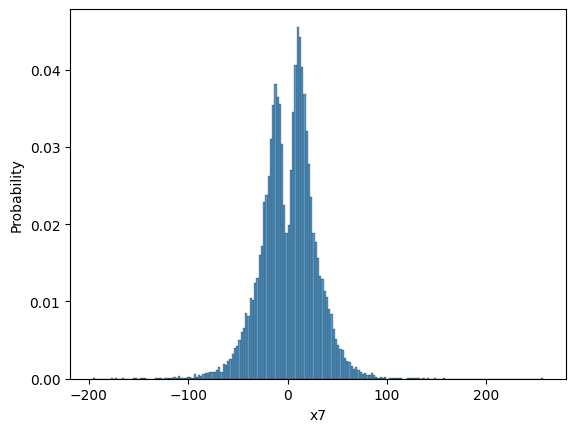

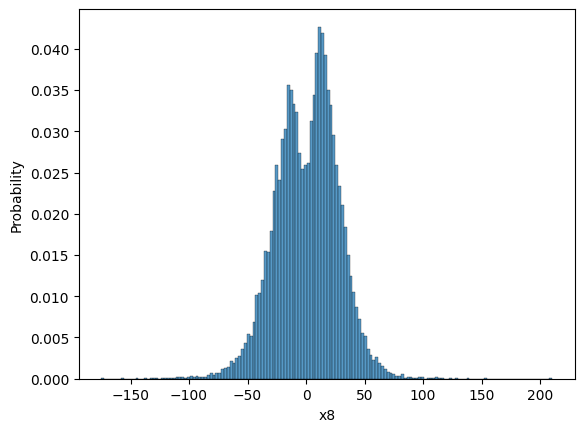

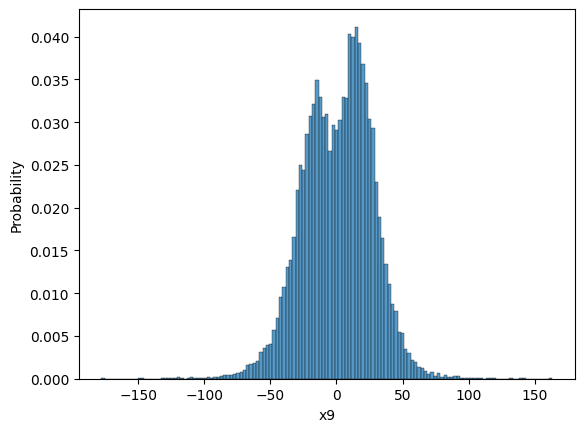

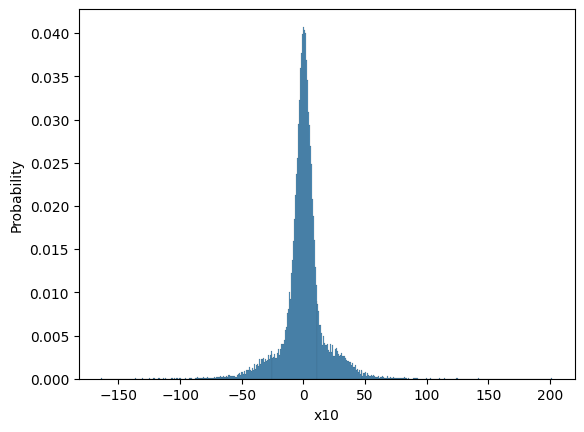

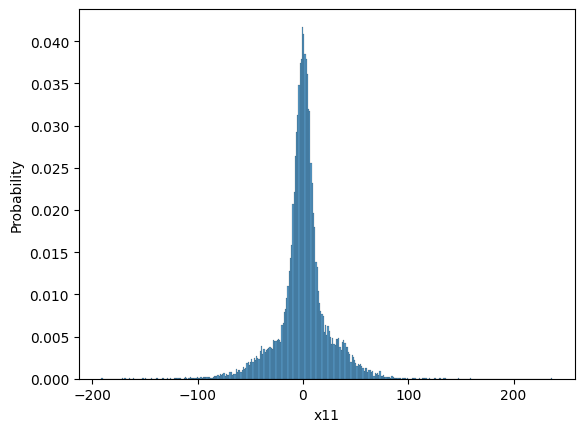

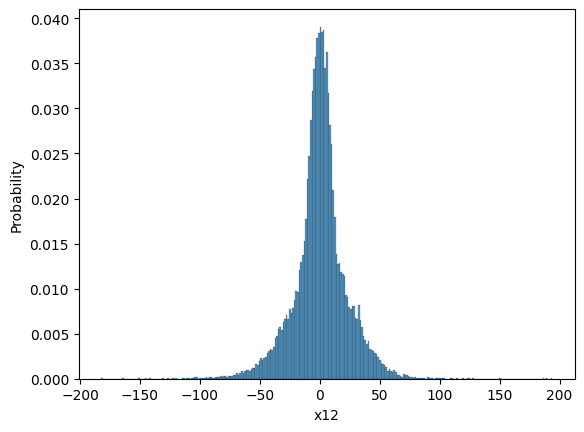

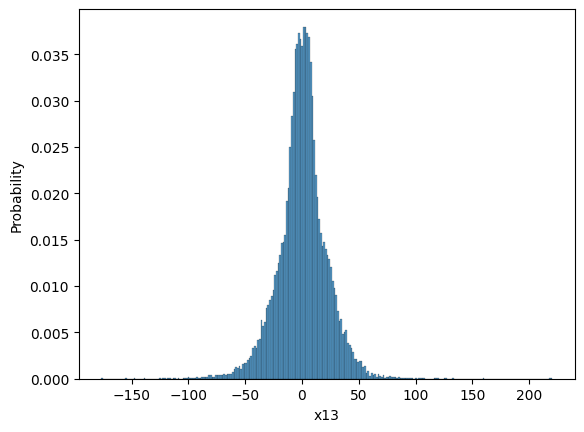

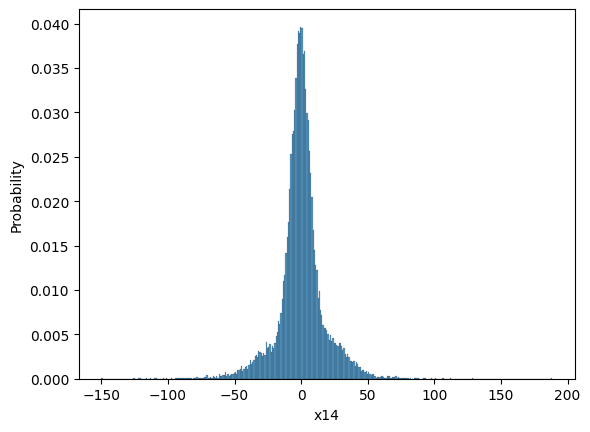

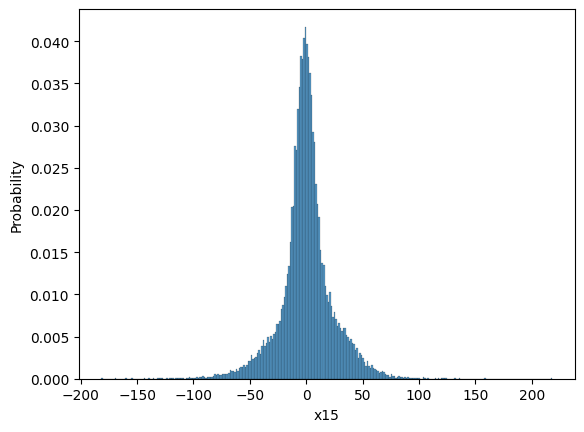

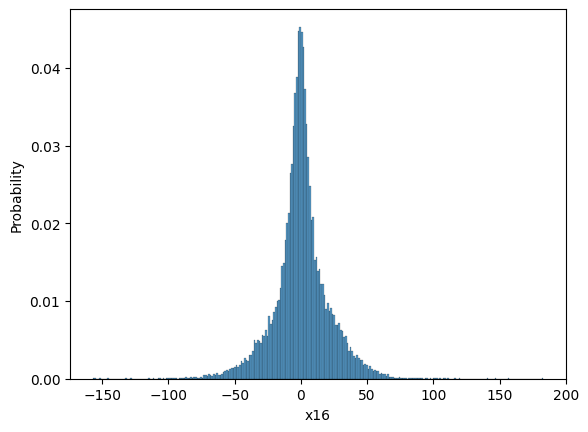

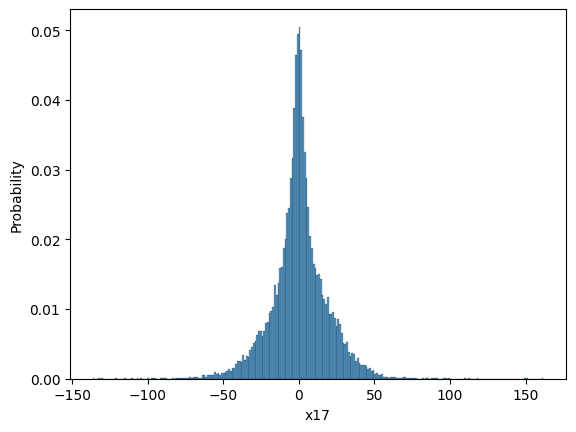

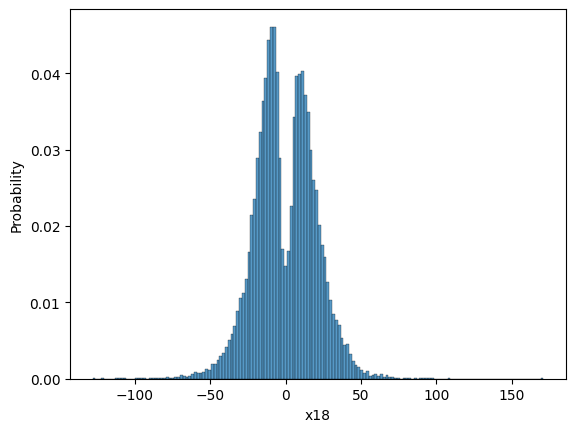

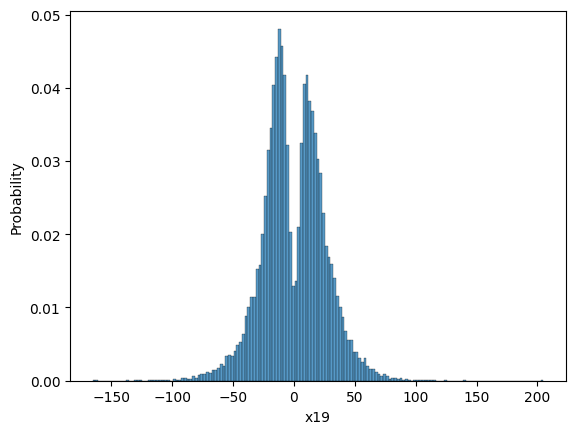

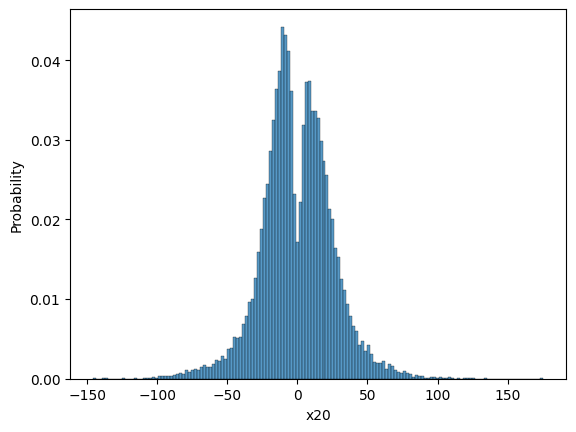

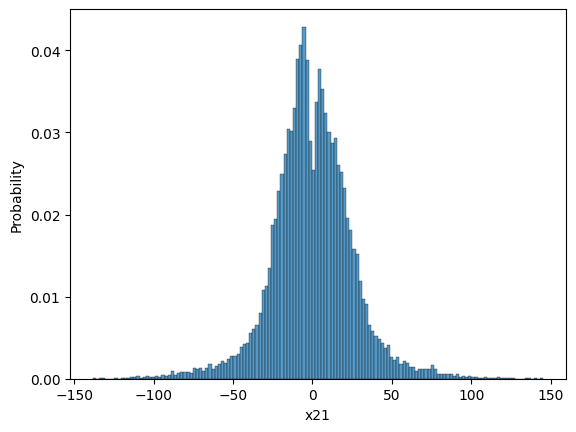

In [13]:
for i in range(1,22):
  sns.histplot(data=features,x=f"x{str(i)}",stat="probability")
  plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

# SVM

In [15]:
# use SVM rbf with gamma = 0.1
svm_gamma_01 =SVC(kernel='rbf',gamma=0.1)
svm_gamma_01.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1)

In [16]:
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(X_test, y_test))

Gamma = 0.1
Accuracy: 0.0572541382667965


In [ ]:
utils.plot_model(X_test, y_test, svm_gamma_01)

In [17]:
# use SVM rbf with gamma = 1
svm_gamma_1 =SVC(kernel='rbf',gamma=1)
svm_gamma_1.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=1)

In [18]:
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(X_test, y_test))

Gamma = 1
Accuracy: 0.0572541382667965


In [ ]:
utils.plot_model(X_test, y_test, svm_gamma_1)

In [19]:
# use SVM rbf with gamma = 10
svm_gamma_10 =SVC(kernel='rbf',gamma=10)
svm_gamma_10.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=10)

In [20]:
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(X_test, y_test))

Gamma = 10
Accuracy: 0.0572541382667965


In [ ]:
utils.plot_model(X_test, y_test, svm_gamma_10)

In [21]:
# use SVM rbf with gamma = 100
svm_gamma_100 =SVC(kernel='rbf',gamma=100)
svm_gamma_100.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=100)

In [22]:
print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(X_test, y_test))

Gamma = 100
Accuracy: 0.0572541382667965


In [ ]:
utils.plot_model(X_test, y_test, svm_gamma_100)